<a href="https://colab.research.google.com/github/E-girgen/Thesis-Data-Science-Society/blob/main/SVM_cleaned_captions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd "/content/drive/MyDrive/"
%cd "/content/drive/MyDrive/Colab Notebooks"

Mounted at /content/drive
/content/drive/MyDrive


In [ ]:
data = pd.read_csv("cleaned_captions_pre.csv")
 # Stel tab als scheidingsteken in


In [ ]:
df = data[data['Category'] != 'other']
nd = df[[ 'Text', 'Category']]
nd.reset_index(drop=True, inplace=True)
print(nd.head())

                                                Text Category
0  kweenie of da gij al es goed hebben stilgestaa...  neutral
1                                              santé      joy
2  ja kvind wel spannend das zo ineens euh de vuu...     fear
3  als ik één dag werk in in in de horecazaak waa...    anger
4  een baas zijn een baas he die moeten je respec...    anger


In [ ]:
import pandas as pd
import spacy
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder = LabelEncoder()
nd['Category'] = label_encoder.fit_transform(nd['Category'])

In [ ]:
label_encodings = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(label_encodings)

{'anger': 0, 'fear': 1, 'joy': 2, 'love': 3, 'neutral': 4, 'sadness': 5}


In [ ]:
import seaborn as sns
import re
import nltk
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

Fold 10 - Nauwkeurigheid: 0.51, Precisie: 0.46036866359447, Recall: 0.3827617615618215, F1-Score: 0.3801733854903864
Classificatie Rapport:
              precision    recall  f1-score   support

           0       0.42      0.65      0.51        20
           1       0.67      0.22      0.33         9
           2       0.53      0.77      0.63        31
           3       0.00      0.00      0.00         4
           4       0.50      0.18      0.26        17
           5       0.64      0.47      0.55        19

    accuracy                           0.51       100
   macro avg       0.46      0.38      0.38       100
weighted avg       0.52      0.51      0.48       100



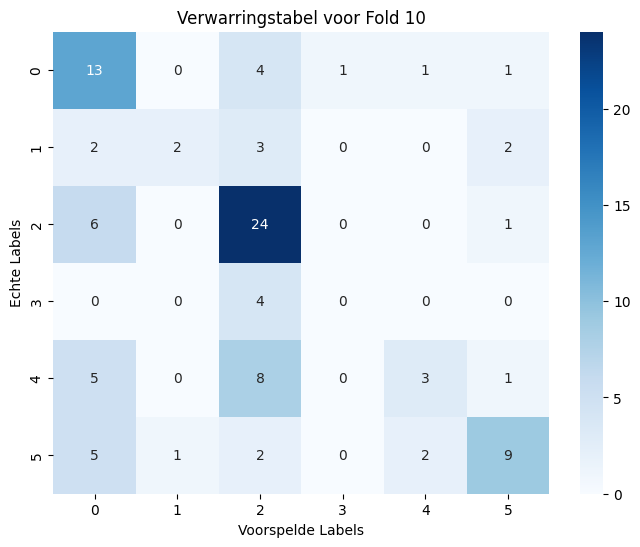


Gemiddelde scores over alle folds - Nauwkeurigheid: 0.51, Precisie: 0.46036866359447, Recall: 0.3827617615618215, F1-Score: 0.3801733854903864


In [ ]:
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder

# Initialiseer een TfidfVectorizer
vectorizer = TfidfVectorizer()

fold_number = 10

# Transformeer de tekst naar vectoren
X_tfidf = vectorizer.fit_transform(nd['Text'])
y_labels = nd['Category']

# Initialiseer een LabelEncoder
label_encoder = LabelEncoder()

# Encodeer de categorieën naar numerieke waarden
y_labels_encoded = label_encoder.fit_transform(y_labels)

# Initialiseer het Support Vector Machine-model
svm = SVC()

# Definieer het parametergrid voor GridSearchCV
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [3, 5, 7],
    'coef0': [0, 1, 3]
}

# Initialiseer K-Fold cross-validator
kf = KFold(n_splits=10, shuffle=True, random_state=2022)

# Initialiseer GridSearchCV met 10-fold cross-validation en f1-macro als score
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=kf, scoring='f1_macro')

# Lijsten om resultaten per fold op te slaan
accuracies = []
precisions = []
recalls = []
f1_scores = []
conf_matrices = []

# Loop over de folds
for fold, (train_idx, test_idx) in enumerate(kf.split(X_tfidf)):
    if fold == fold_number - 1:  # Indexen zijn 0-gebaseerd, daarom -1
        X_train, X_test = X_tfidf[train_idx], X_tfidf[test_idx]
        y_train, y_test = y_labels_encoded[train_idx], y_labels_encoded[test_idx]

        # Voer GridSearchCV uit op de trainingsdata
        grid_search.fit(X_train, y_train)

        # Haal de beste parameters op
        best_params = grid_search.best_params_

        # Gebruik de beste parameters in je definitieve model
        final_svm = SVC(**best_params)

        # Train het model op de trainingsdata
        final_svm.fit(X_train, y_train)

        # Voorspel de categorieën op de testset
        y_pred = final_svm.predict(X_test)

        # Decodeer de voorspelde labels terug naar de originele tekstuele categorieën
        y_test_decoded = label_encoder.inverse_transform(y_test)
        y_pred_decoded = label_encoder.inverse_transform(y_pred)

        # Bereken en sla de metingen op
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='macro')
        recall = recall_score(y_test, y_pred, average='macro')
        f1 = f1_score(y_test, y_pred, average='macro')
        conf_matrix = confusion_matrix(y_test, y_pred)

        accuracies.append(accuracy)
        precisions.append(precision)
        recalls.append(recall)
        f1_scores.append(f1)
        conf_matrices.append(conf_matrix)

        print(f"Fold {fold + 1} - Nauwkeurigheid: {accuracy}, Precisie: {precision}, Recall: {recall}, F1-Score: {f1}")

        # Druk het classificatie rapport af
        print("Classificatie Rapport:")
        print(classification_report(y_test_decoded, y_pred_decoded))

        # Plot de verwarringstabel als een heatmap
        plt.figure(figsize=(8, 6))
        sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
        plt.xlabel('Voorspelde Labels')
        plt.ylabel('Echte Labels')
        plt.title(f'Verwarringstabel voor Fold {fold + 1}')
        plt.show()

# Gemiddelde scores over alle folds
avg_accuracy = sum(accuracies) / len(accuracies)
avg_precision = sum(precisions) / len(precisions)
avg_recall = sum(recalls) / len(recalls)
avg_f1 = sum(f1_scores) / len(f1_scores)

print(f"\nGemiddelde scores over alle folds - Nauwkeurigheid: {avg_accuracy}, Precisie: {avg_precision}, Recall: {avg_recall}, F1-Score: {avg_f1}")


In [ ]:
final_svm

SVC(C=10, coef0=0, kernel='sigmoid')

With smote

Fold 10 - Accuracy: 0.5, Precision: 0.46460043787629995, Recall: 0.39199818014359117, F1-Score: 0.40058097843984797
Classification Report:
              precision    recall  f1-score   support

           0       0.41      0.60      0.49        20
           1       0.75      0.33      0.46         9
           2       0.52      0.71      0.60        31
           3       0.00      0.00      0.00         4
           4       0.50      0.24      0.32        17
           5       0.60      0.47      0.53        19

    accuracy                           0.50       100
   macro avg       0.46      0.39      0.40       100
weighted avg       0.51      0.50      0.48       100



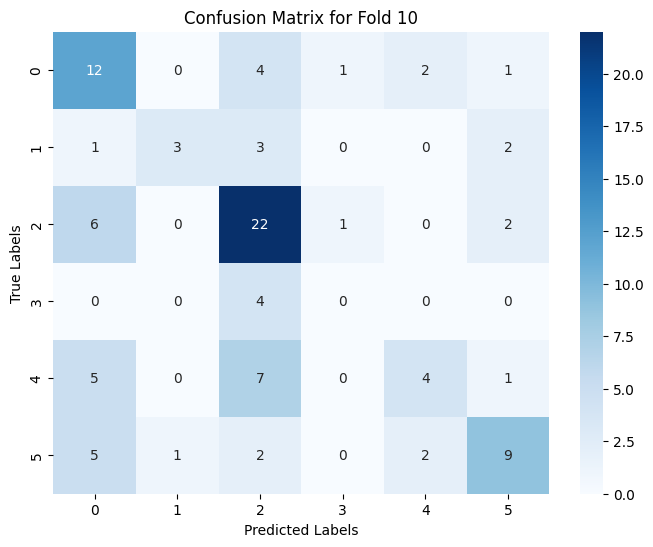


Average scores across all folds - Accuracy: 0.5, Precision: 0.46460043787629995, Recall: 0.39199818014359117, F1-Score: 0.40058097843984797


In [ ]:
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

# Initialize a TfidfVectorizer
vectorizer = TfidfVectorizer()

fold_number = 10

# Transform text to vectors
X_tfidf = vectorizer.fit_transform(nd['Text'])
y_labels = nd['Category']

# Initialize a LabelEncoder
label_encoder = LabelEncoder()

# Encode the categories into numerical values
y_labels_encoded = label_encoder.fit_transform(y_labels)

# Initialize the Support Vector Machine model
svm = SVC()

# Initialize K-Fold cross-validator
kf = KFold(n_splits=10, shuffle=True, random_state=2022)

# Initialize GridSearchCV with 10-fold cross-validation and f1-macro as the scoring metric
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=kf, scoring='f1_macro')

# Lists to store results per fold
accuracies = []
precisions = []
recalls = []
f1_scores = []
conf_matrices = []

# Loop over the folds
for fold, (train_idx, test_idx) in enumerate(kf.split(X_tfidf)):
    if fold == fold_number - 1:  # Indexes are 0-based, hence -1
        X_train, X_test = X_tfidf[train_idx], X_tfidf[test_idx]
        y_train, y_test = y_labels_encoded[train_idx], y_labels_encoded[test_idx]

        # Apply SMOTE to balance the class distribution
        smote = SMOTE(random_state=2022)
        X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

        # Use the best parameters in your final model
        final_svm = SVC(**best_params)

        # Train the model on the resampled training data
        final_svm.fit(X_train_resampled, y_train_resampled)

        # Predict categories on the test set
        y_pred = final_svm.predict(X_test)

        # Decode the predicted labels back to the original textual categories
        y_test_decoded = label_encoder.inverse_transform(y_test)
        y_pred_decoded = label_encoder.inverse_transform(y_pred)

        # Calculate and store the metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='macro')
        recall = recall_score(y_test, y_pred, average='macro')
        f1 = f1_score(y_test, y_pred, average='macro')
        conf_matrix = confusion_matrix(y_test, y_pred)

        accuracies.append(accuracy)
        precisions.append(precision)
        recalls.append(recall)
        f1_scores.append(f1)
        conf_matrices.append(conf_matrix)

        print(f"Fold {fold + 1} - Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1-Score: {f1}")

        # Print the classification report
        print("Classification Report:")
        print(classification_report(y_test_decoded, y_pred_decoded))

        # Plot the confusion matrix as a heatmap
        plt.figure(figsize=(8, 6))
        sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
        plt.xlabel('Predicted Labels')
        plt.ylabel('True Labels')
        plt.title(f'Confusion Matrix for Fold {fold + 1}')
        plt.show()

# Average scores across all folds
avg_accuracy = sum(accuracies) / len(accuracies)
avg_precision = sum(precisions) / len(precisions)
avg_recall = sum(recalls) / len(recalls)
avg_f1 = sum(f1_scores) / len(f1_scores)

print(f"\nAverage scores across all folds - Accuracy: {avg_accuracy}, Precision: {avg_precision}, Recall: {avg_recall}, F1-Score: {avg_f1}")


In [ ]:
final_svm = SVC(**best_params)

In [ ]:
final_svm

SVC(C=10, coef0=0, kernel='sigmoid')

In [ ]:
best_params

In [ ]:
example_sentence = "ik ben boos"
example_sentence_tfidf = vectorizer.transform([example_sentence])
example_pred = svm.predict(example_sentence_tfidf)
print(f"Voorspelde emotie voor de voorbeeldzin: {example_pred[0]}")
